### 4. SVD(Singular Value Decomposition)

#### SVD 개요
- PCA와 유사한 행렬 분해 기법 이용
- PCA의 경우 정방행렬(행,열 크기가 같은 행렬)만 고유벡터로 분해할 수 있지만,   
  SVD는 정방행렬 뿐만 아니라 행과 열 크기가 다른 행렬에도 적용할 수 있음
- m x n크기의 행렬A를 다음과 같이 분해하는 것을 의미
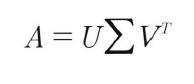
- 특이값 분해로 불리며 , 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이고    
모든 특이벡터는 서로 직교하는 성질 가짐
- $\sum$는 대각행렬이며, 행렬 대각에 위치한 값만 0이 아니고 나머지 값은 모두 0임.
- 이때의 0이 아닌 값이 바로 행렬 A의 특이값임.
- A의 차원이 m x n일 때, U의 차원이 m x m, $\sum$의 차원이 m x n , $V^T$의 차원이 n x n 으로 분해
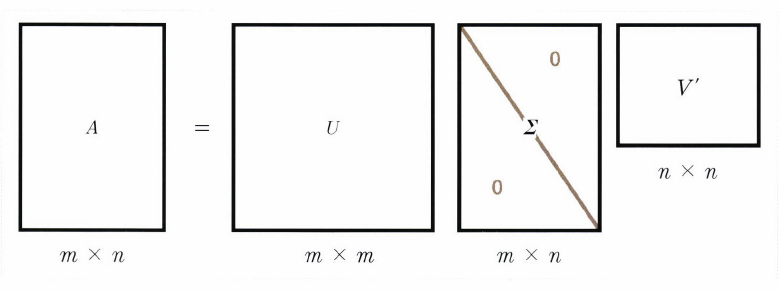

- 일반적으로 $\sum$의 비대각 부분과 대각원소 중 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$에 대응되는 U,V 원소도 함께 제거해 차원을 줄인 형태로 SVD 적용함
- A의 차원이 m x n일 때, U의 차원이 m x p, $\sum$의 차원이 p x p , $V^T$의 차원이 p x n 으로 분해
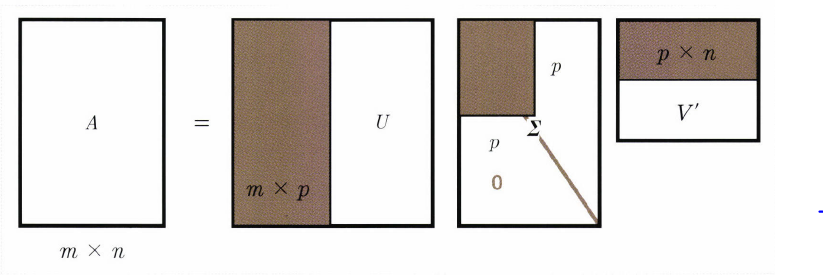

**Truncated SVD**
- SVD의 $\sum$의 대각원소 중 상위 몇개만 추출해 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해

- 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리로 수행

In [32]:
from numpy.linalg import svd
# 랜덤 행렬 생성 이유 : 행렬의 개별 로우끼리 의존성 없애기 위해
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [33]:
# 생성된 a 행렬에 SVD 적용해 U, Sigma, Vt 도출
U, Sigma, Vt = svd(a)
print('U matrix:\n', np.round(U,3)) # 4 x 4
print('Sigma Value:\n', np.round(Sigma,3)) # 4 x 1 / 0이 아닌 값들만 1차원 행렬로 표현
print('V transpose matrix:\n', np.round(Vt,3)) # 4 x 4

U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [36]:
# U, Sigma, Vt를 이용해 원본 행렬 복원해보기
# U, Sigma, Vt 내적 / Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환해줘야함
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print('복원한 행렬:\n',np.round(a_,3))
print('\n')
print('원본 행렬:\n', np.round(a,3))

복원한 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


원본 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [37]:
# 로우 간 의존성이 있을 경우 Sigma값이 어떻게 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기
# 일부로 의존성 부여를 위해 3번째 로우 = 1번째 로우 + 2번째 로우 , 4번째 로우 = 1번째 로우 로 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
# SVD로 분해
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))
# 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함
# 즉 선형 독립인 로우 벡터의 개수가 2개라는 의미임(행렬의 rank = 2)

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [40]:
# 원본 행렬로 복원해보기
# 전체 데이터가 아니라 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print('복원한 행렬:\n',np.round(a_,3))
print('\n')
print('원본 행렬:\n', np.round(a,3))

(4, 2) (2, 2) (2, 4)
복원한 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


원본 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [41]:
# Truncated SVD를 이용해 행렬 분해
# 인위적으로 더 작은 차원의 U,Sigma,Vt로 분해하기 때문에 원본 행렬 정확히 복원할 수는 없음
# 데이터의 정보가 압축되어 분해됨에도 상당한 수준으로 원본 행렬 근사는 가능
# 넘파이가 아닌 사이파이에서만 지원됨
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVd

print('\nTruncated SVD로 분해 후 복원한 행렬:\n', matrix_tr)
# 완벽하게 복원되지는 않았지만 근사적으로 복원됨

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원한 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 사이파이의 svds와 같이Truncated SVD 연산을 수행해 원본 행렬 분해한 U, Sigma, Vt 행렬을 반환하지는 않음
- PCA 클래스와 유사하게 fit(), transform() 호출해 원본 데이터를 몇개의 주요 컴포넌트로 차원 축소해 변환
- 원본 데이터를 Truncated SVD방식으로 분해된 U * Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


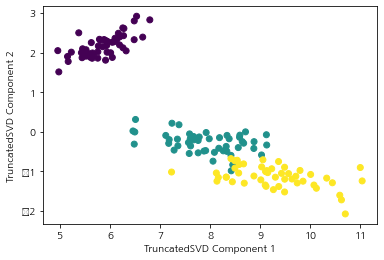

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA

iris = load_iris()
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x = iris_tsvd[:,0], y=iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
# PCA와 유사하게 변환후 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가짐
# 사이킷런의 TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬 분해

Text(0.5, 1.0, 'PCA Transformed')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


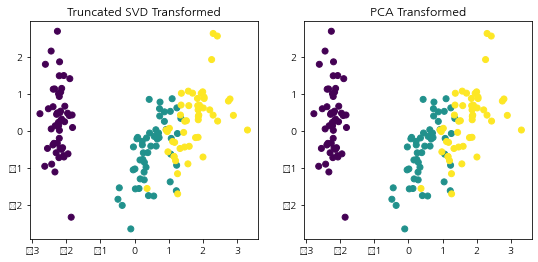

In [43]:
# TruncatedSVD와 PCA 클래스 유사성 확인
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig,(ax1,ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [45]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
# 차이가 모두 0에 가까우므로 두 변환이 서로 동일함을 알 수 있음
# 스케일링으로 데이터의 중심이 동일해지면서 사이킷런의 SVD와 PCA는 동일한 변환 수행함
# 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미함
# 하지만 PCA는 밀집 행렬에 대한 변환만 가능하고 SVD는 희소 행렬도 변환 가능함

2.3657869644792365e-15
-7.19910242530375e-17


### 5. NMF(Non-Negative Matrix Factorization)

#### NMF 개요
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low_Rank Approximation) 방식의 변형
- 원본 행렬 내 모든 원소 값이 모두 양수라는게 보장되면 아래와 같이 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법 지칭
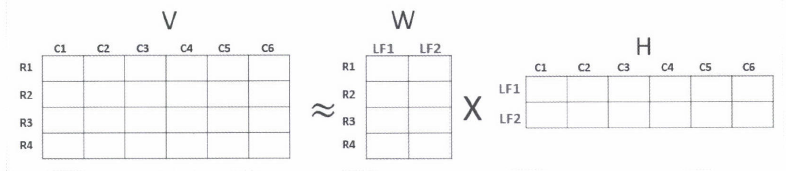
- 행렬 분해를 하게되면 W행렬과 H행렬은 일반적으로 길고 가는 행렬 W(원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬) 와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해됨
- 이렇게 분해된 행렬은 잠재 요소를 특성으로 가짐
- 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며
- 분해 행렬 H는 이 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지를 나타냄
- SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트 토픽 도출등의 영역에서 사용됨

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Components 2')

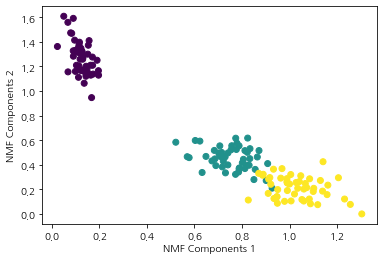

In [47]:
# 붓꽃 데이터로 실습
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Components 1')
plt.ylabel('NMF Components 2')

### 6. 정리

- 차원 축소는 단순히 피처의 개수를 줄이는 개념보다 이를 통해 데이터를 잘 설명할 수 있는 잠재적 요소를 추출하는데 큰 의미가 있음.
- 이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등 차원 축소 알고리즘이 활발하게 사용됨

**PCA**
- 입력 데이터의 변동성이 가장 큰 축을 구하고, 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식
- 입력 데이터의 공분산 행렬을 기반으로 고유 벡터(Eigenvector)를 생성하고 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식


**LDA**
- PCA와 매우 유사한 방식
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소

**SVD, NMF**
- 매우 많은 피처 데이터를 가진 고차원 행렬을 두  개의 저차원 행렬로 분리하는 행렬 분해 기법
- 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용됨